In [1]:
from warnings import  filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\PRAJAKTA\Downloads\Mall_Customers.csv"

In [5]:
mall= pd.read_csv(path)

In [6]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
mall.duplicated().sum()

np.int64(0)

In [11]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
x = mall[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [13]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [15]:
x.columns = ['Age', 'Annual Income',
       'Spending Score']

In [16]:
x.columns

Index(['Age', 'Annual Income', 'Spending Score'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

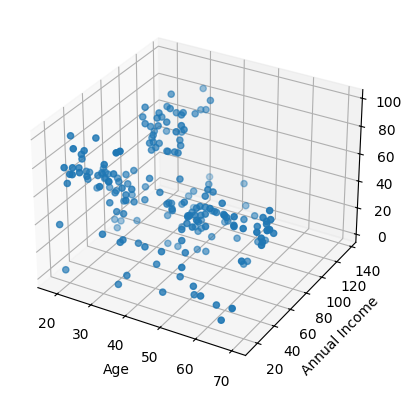

In [18]:
plt.figure()
ax = plt.axes(projection = '3d')
x1= x['Age']
y1= x['Annual Income'] 
z1= x['Spending Score']
plt.xlabel('Age')
plt.ylabel('Annual Income')
#plt.zlable('Spending Score')
ax.scatter(x1, y1, z1)
plt.show

In [20]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()


In [21]:
x_scaled = st.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns= x.columns)

In [22]:
x_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [19]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
ag = AgglomerativeClustering(n_clusters=5,  linkage='ward')
ag.fit(x_scaled)

AgglomerativeClustering(n_clusters=5)

In [61]:
lb= ag.labels_
lb

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0,
       4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [63]:
cols = []
for i in lb:
    if i == 0:
        cols.append('red')
    elif i == 1:
        cols.append('green')
    elif i == 2:
        cols.append('yellow')
    elif i ==3:
        cols.append('blue')
    else:
        cols.append('black')           

<function matplotlib.pyplot.show(close=None, block=None)>

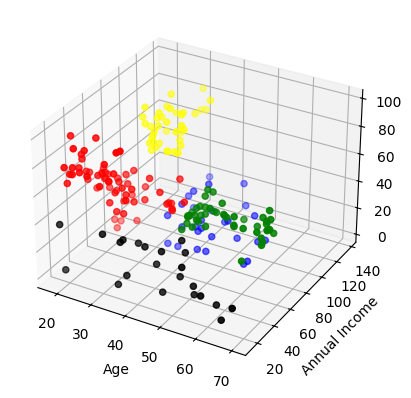

In [64]:
plt.figure()
ax = plt.axes(projection = '3d')
x1= x['Age']
y1= x['Annual Income'] 
z1= x['Spending Score']
plt.xlabel('Age')
plt.ylabel('Annual Income')
#plt.zlable('Spending Score')
ax.scatter(x1, y1, z1,c=cols)
plt.show

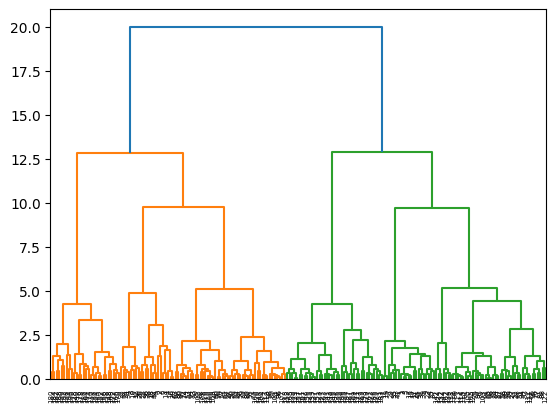

In [65]:
from scipy.cluster.hierarchy import linkage, dendrogram
ln = linkage(x_scaled, method='ward')
dendrogram(ln);

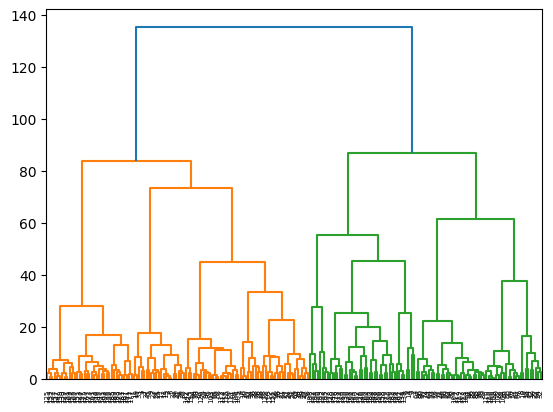

In [66]:
from scipy.spatial import distance_matrix
dm = distance_matrix(x_scaled, x_scaled)
ln = linkage(dm, method='ward')
dendrogram(ln);

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(x_scaled, lb)

np.float64(0.39002826186267214)